In [14]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import calendar

In [2]:
DATA_DIR = Path(r"C:\Users\megan\Climate Research\GODAS_data\pottmp")

In [3]:
ds = xr.open_mfdataset(str(DATA_DIR / "pottmp_*_C.nc"),combine="by_coords",parallel=False)

In [4]:
print(ds.lon.values[:5])
print(ds.lon.values[-5:])


[0.5 1.5 2.5 3.5 4.5]
[355.5 356.5 357.5 358.5 359.5]


In [5]:
def nino_box_anoms(ds, latmin, latmax, lonmin, lonmax, weighted=False):
    sst = ds["pottmp"].isel(level=0)  # near-surface
    sst_box = sst.sel(lat=slice(latmin, latmax), lon=slice(lonmin, lonmax))
    if weighted:
        w = np.cos(np.deg2rad(sst_box["lat"]))
        series = sst_box.weighted(w).mean(("lat","lon"), skipna=True)
    else:
        series = sst_box.mean(("lat","lon"), skipna=True)
    clim = series.groupby("time.month").mean("time", skipna=True)
    anom = series.groupby("time.month") - clim
    return series, anom

regions = {
    "Nino1+2": dict(latmin=-10, latmax=0,  lonmin=270, lonmax=280),
    "Nino3":   dict(latmin=-5,  latmax=5,  lonmin=210, lonmax=270),
    "Nino3.4": dict(latmin=-5,  latmax=5,  lonmin=190, lonmax=240),
    "Nino4":   dict(latmin=-5,  latmax=5,  lonmin=160, lonmax=210),
}

results = {}
for name, b in regions.items():
    series, anom = nino_box_anoms(ds, **b, weighted=False) 
    results[name] = {"series": series, "anom": anom}


In [21]:

def plot_month_for_region(ax, results, region, month=1):
    anom = results[region]["anom"]
    sel  = anom.where(anom["time"].dt.month == month, drop=True)
    years = sel["time"].dt.year.values
    vals  = sel.values
    colors = np.where(vals >= 0, "red", "blue")
    ax.plot(years, vals, color="0.7", lw=1)                       
    ax.scatter(years, vals, c=colors, s=60, edgecolor="black")    # colored by sign
    ax.axhline(0, color="k", lw=1)
    ax.set_title(f"{region}")
    ax.set_ylabel("°C")
    ax.grid()




## plot each nino for each month

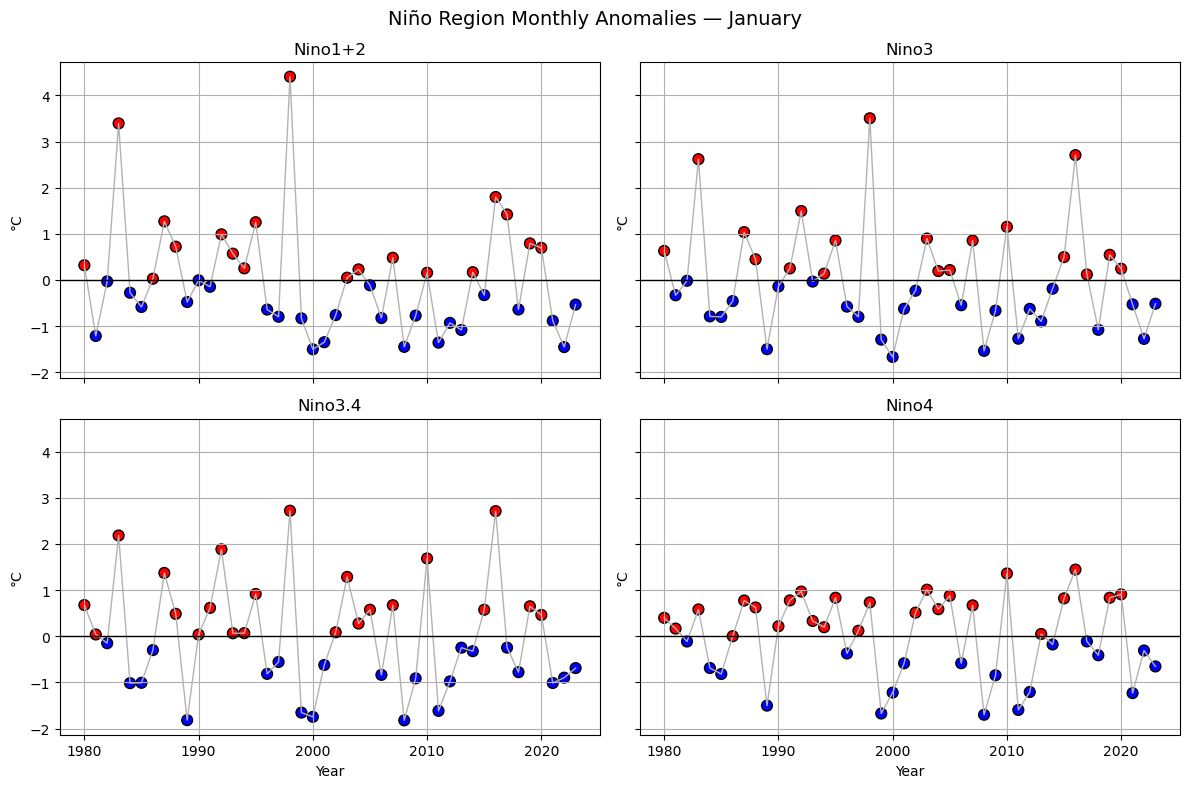

In [22]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 1
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()


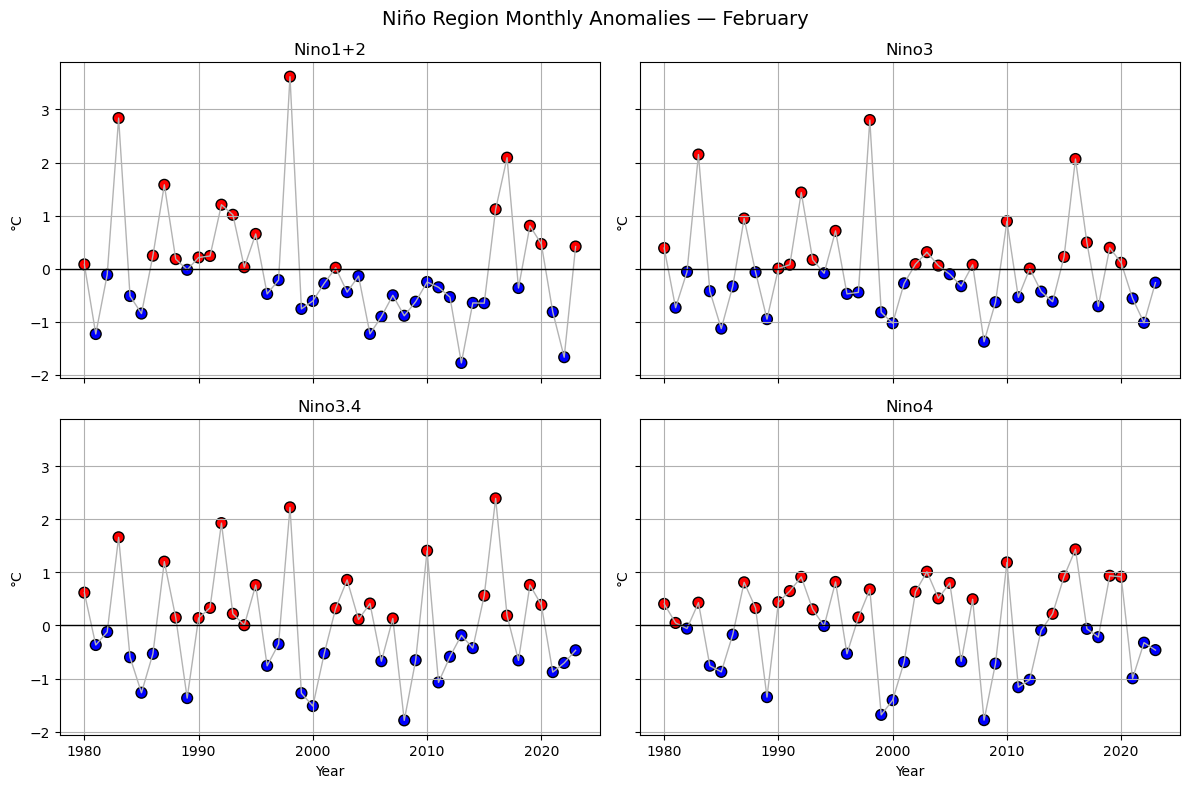

In [23]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 2
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

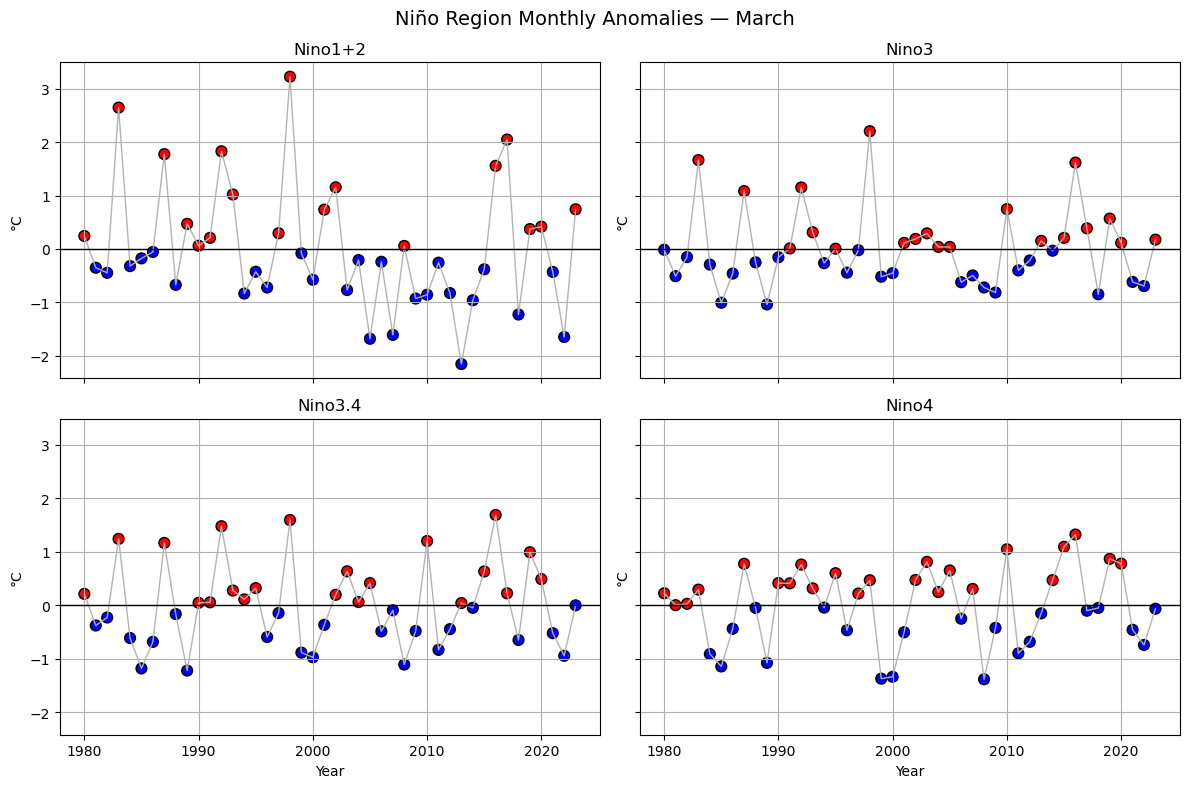

In [24]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 3
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

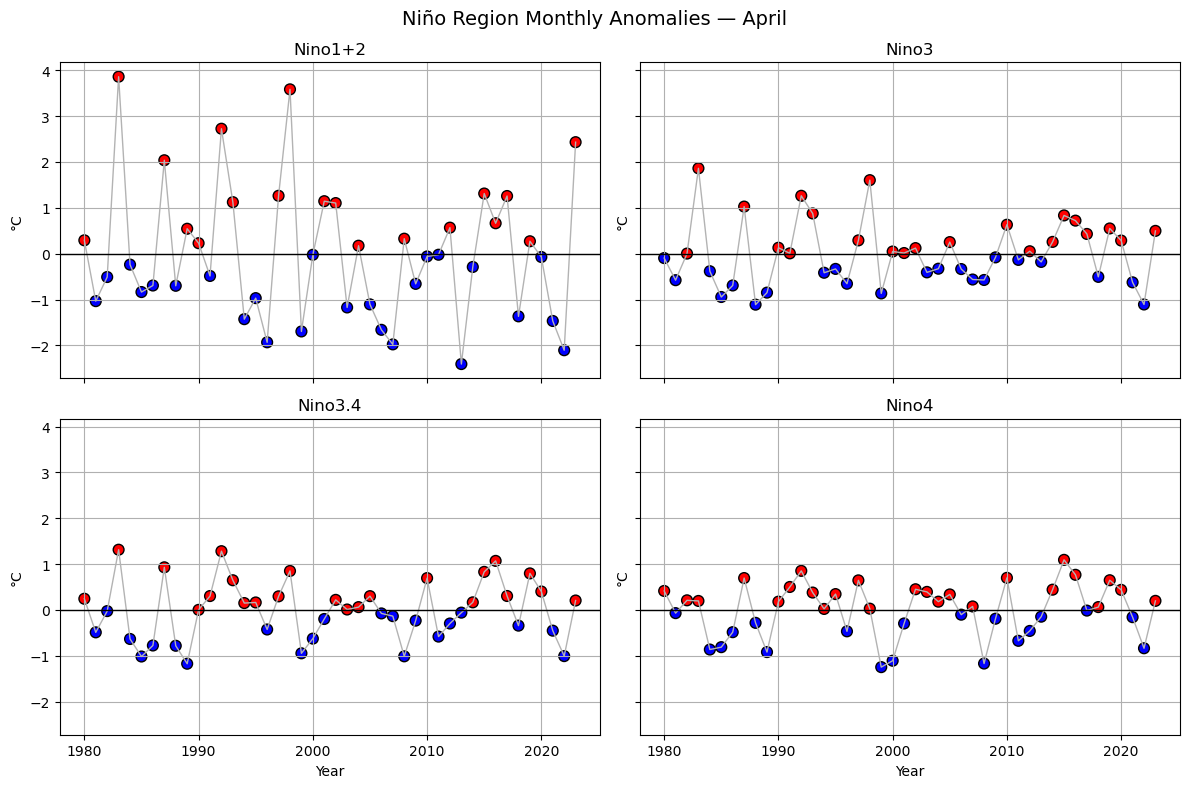

In [25]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 4
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

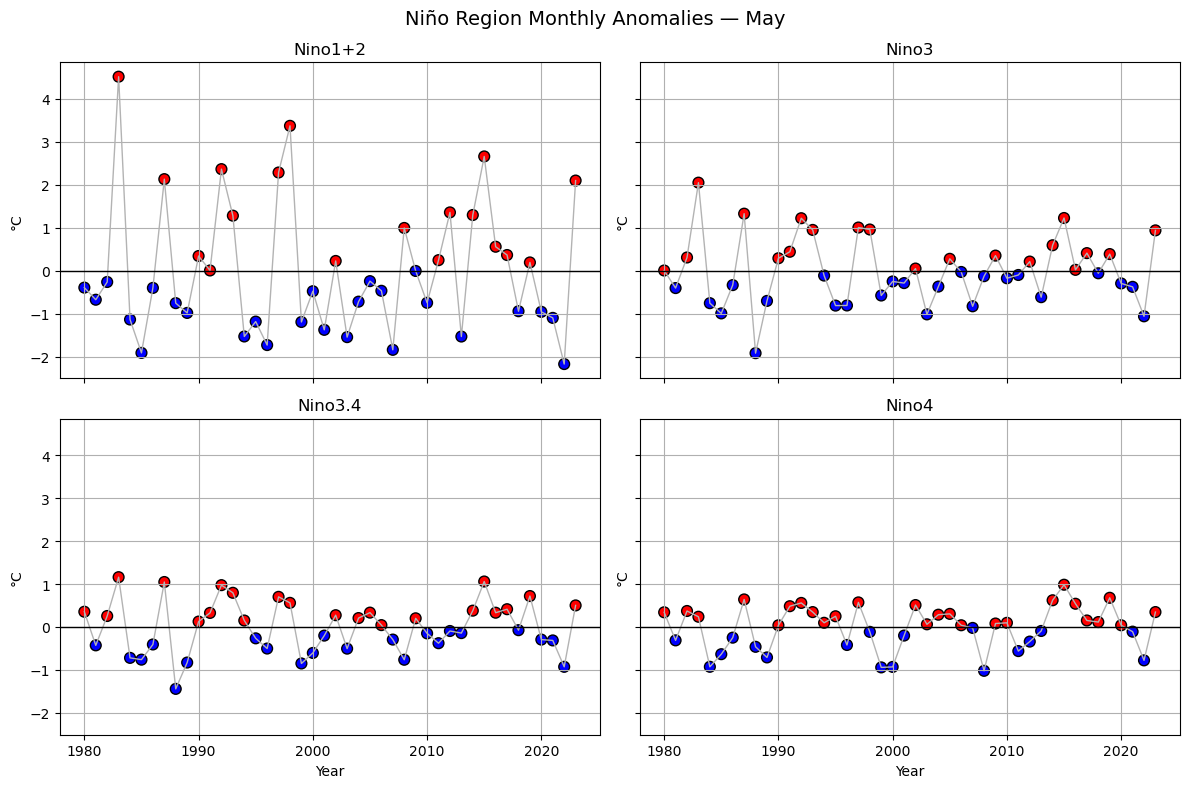

In [26]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 5
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

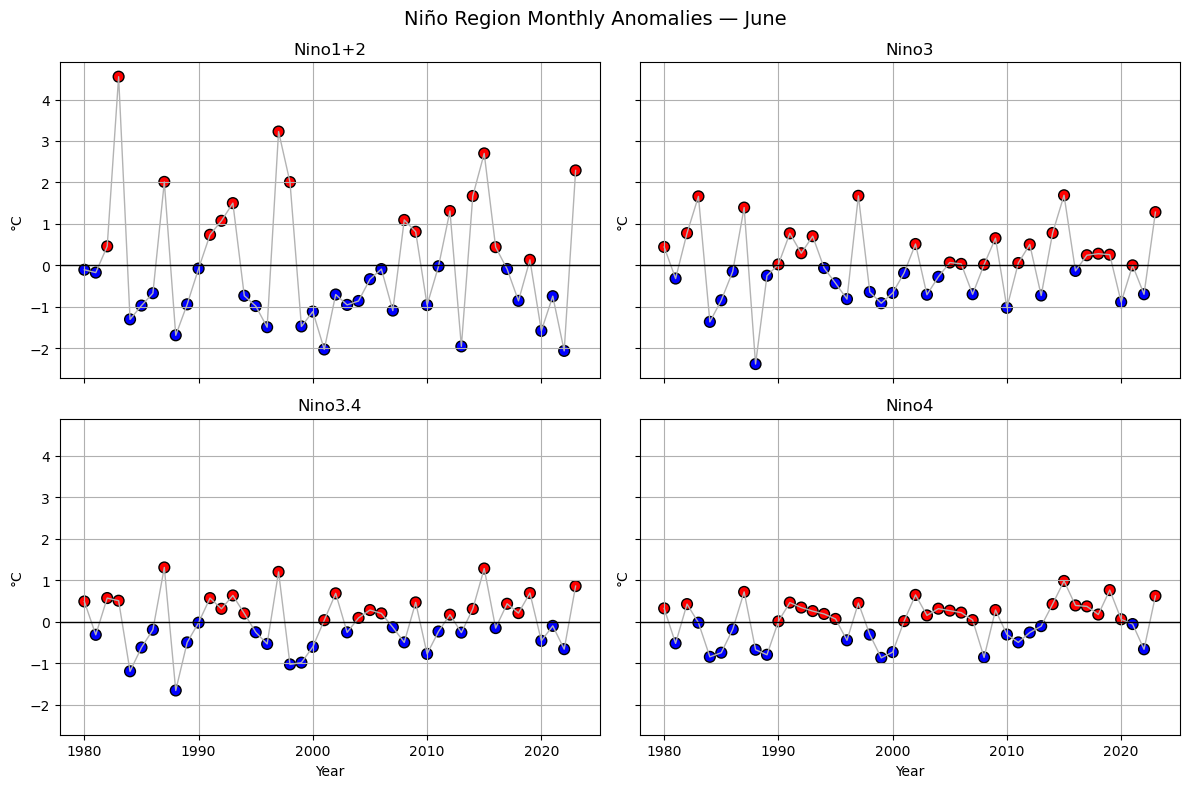

In [27]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 6
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

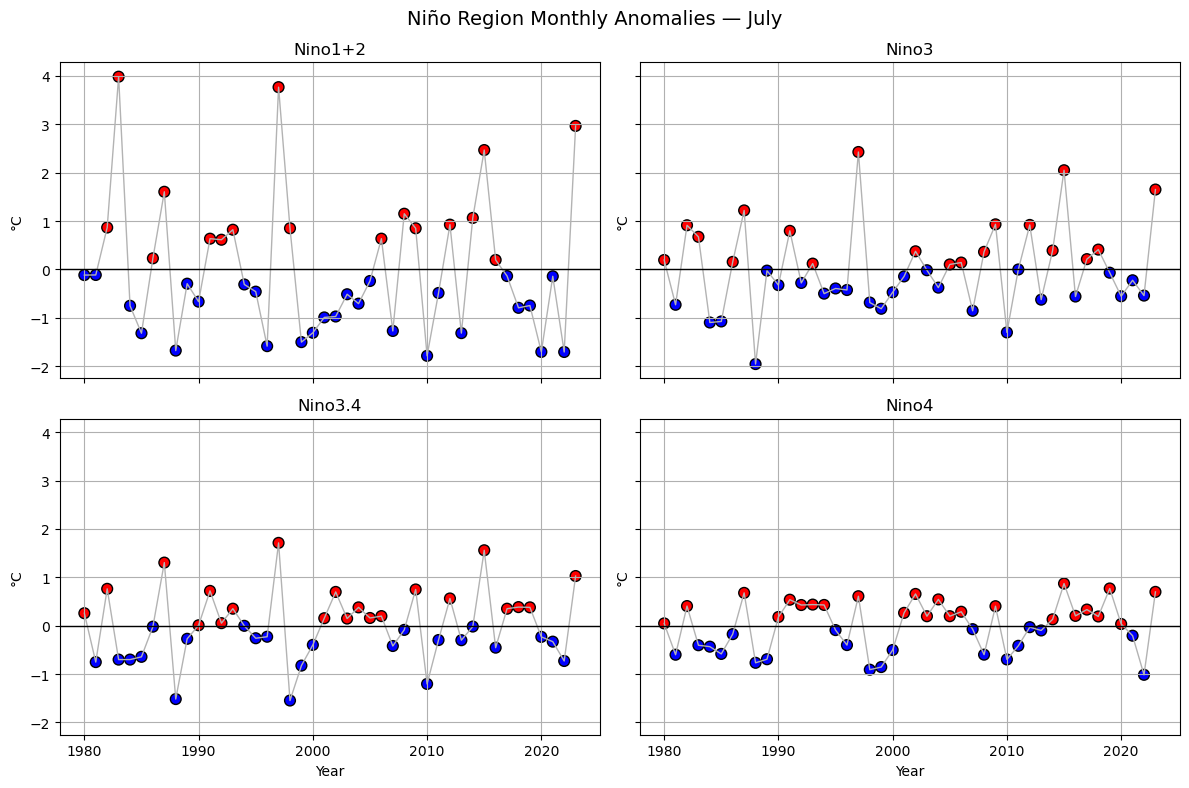

In [28]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 7
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

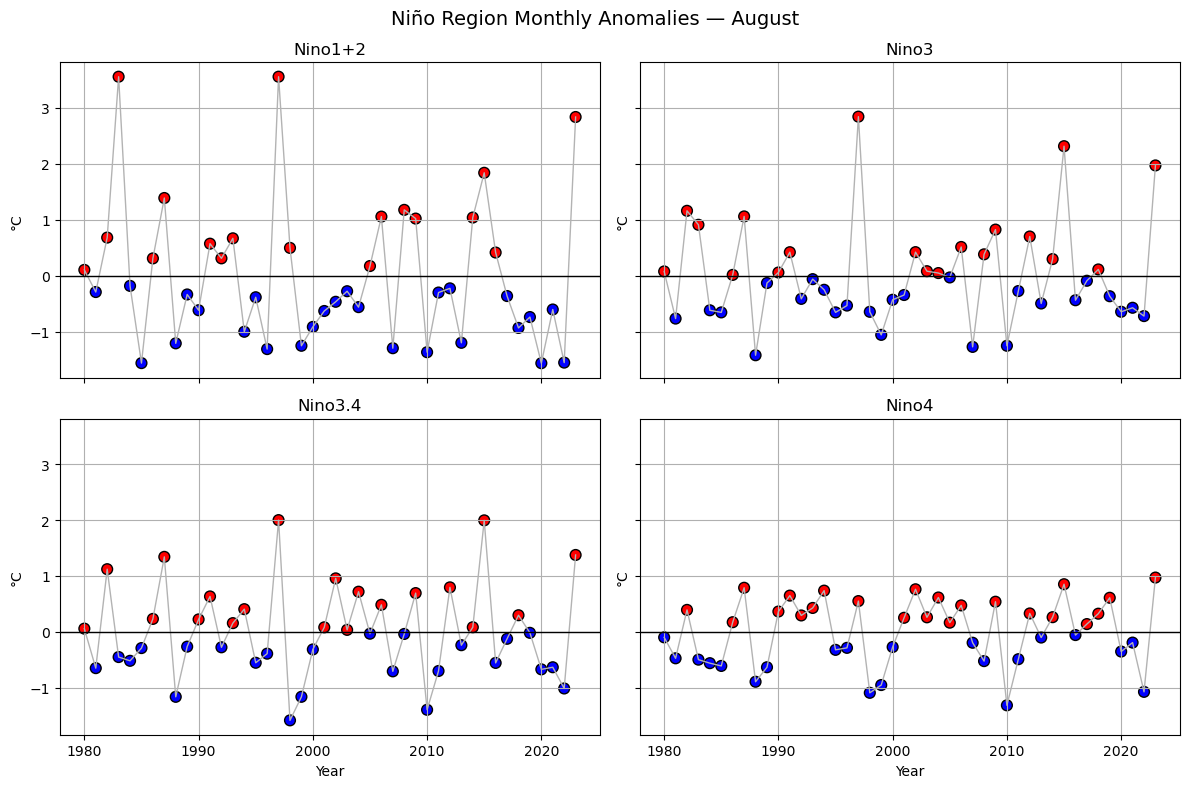

In [29]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 8
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

In [ ]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 9
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

In [ ]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 10
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

In [ ]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 11
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()

In [ ]:
regions = ["Nino1+2", "Nino3", "Nino3.4", "Nino4"]
month   = 12
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()
for ax, r in zip(axs, regions):
    plot_month_for_region(ax, results, r, month=month)
axs[-2].set_xlabel("Year")
axs[-1].set_xlabel("Year")
fig.suptitle(f"Niño Region Monthly Anomalies — {calendar.month_name[month]}", fontsize=14, y=0.98)
fig.tight_layout()
plt.show()